# Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Load Dataset

In [2]:
df_train = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")
df_test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [3]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# EDA

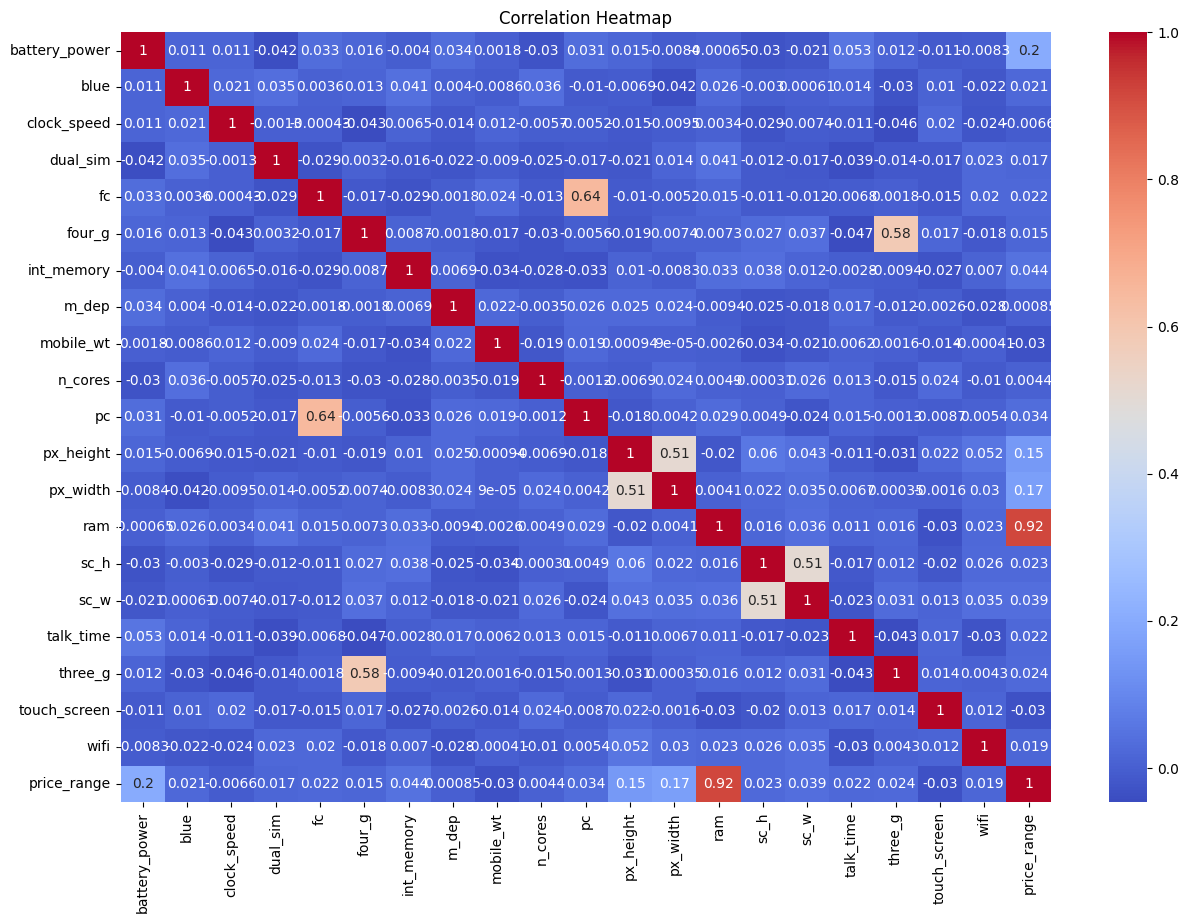

In [7]:
# Correlation heatmap
plt.figure(figsize=(15,10))
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

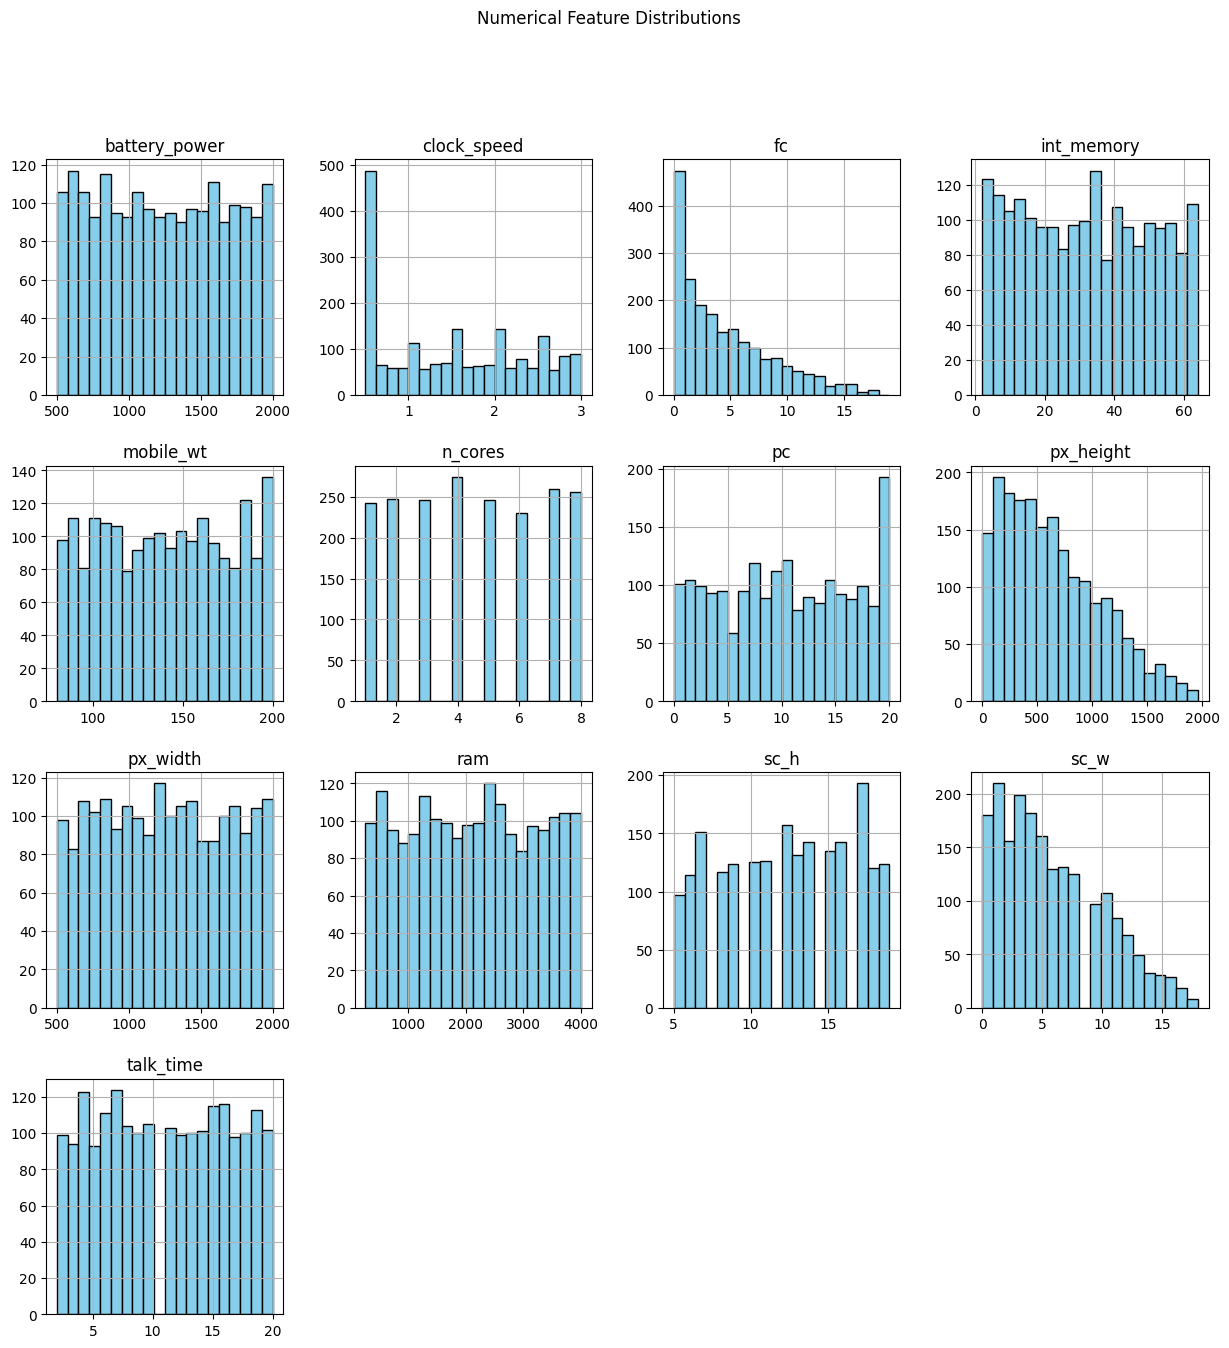

In [8]:
# Distribution of numerical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'mobile_wt',
                      'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
df_train[numerical_features].hist(figsize=(15,15), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numerical Feature Distributions")
plt.show()

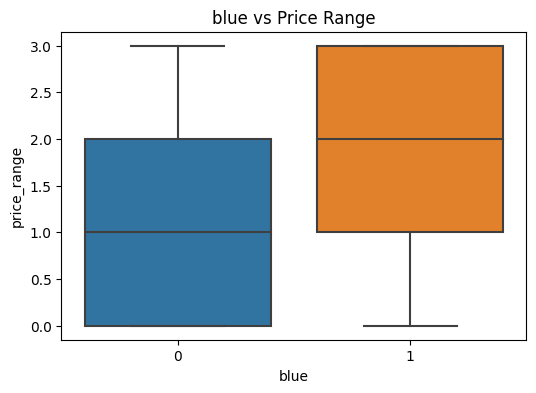

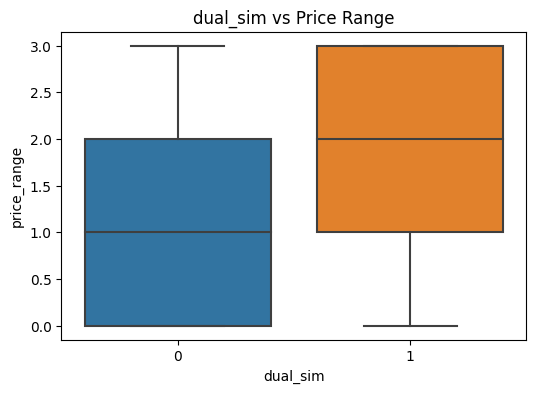

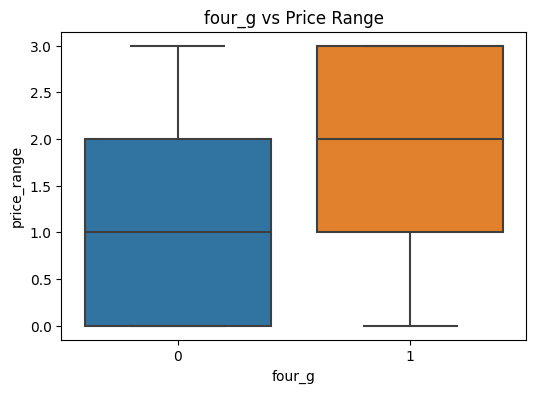

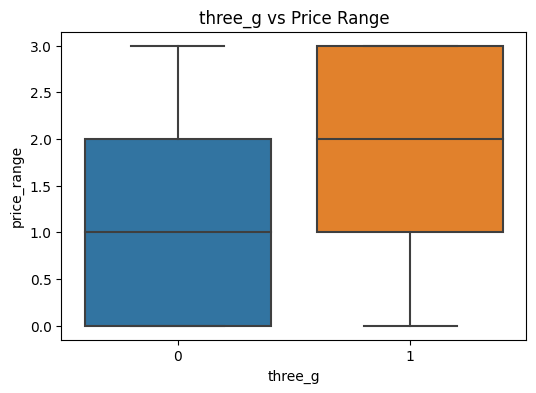

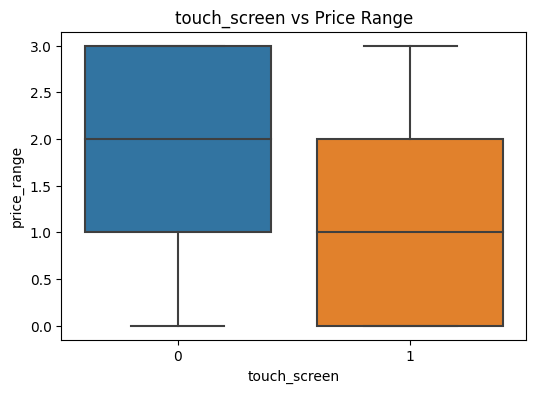

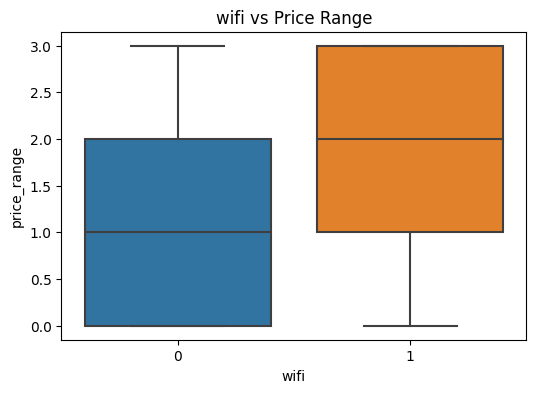

In [9]:
# Boxplots of categorical/binary features vs price_range
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
for feature in binary_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=feature, y='price_range', data=df_train)
    plt.title(f"{feature} vs Price Range")
    plt.show()


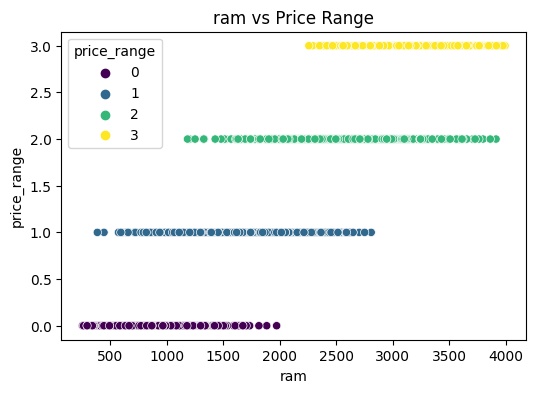

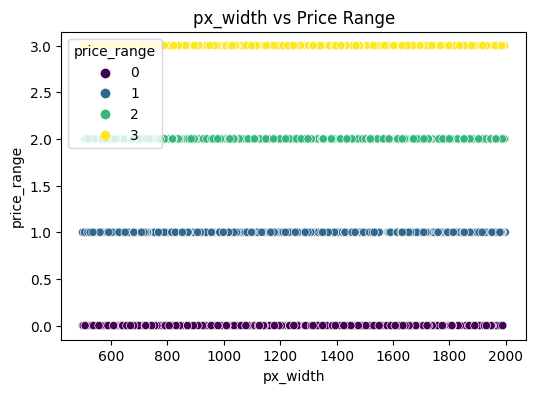

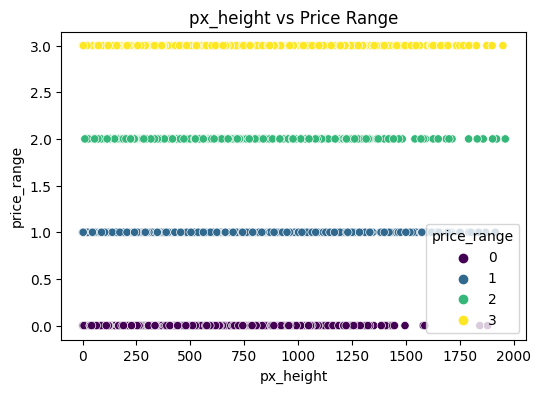

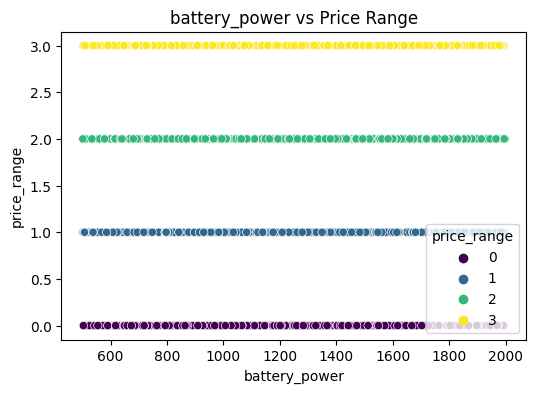

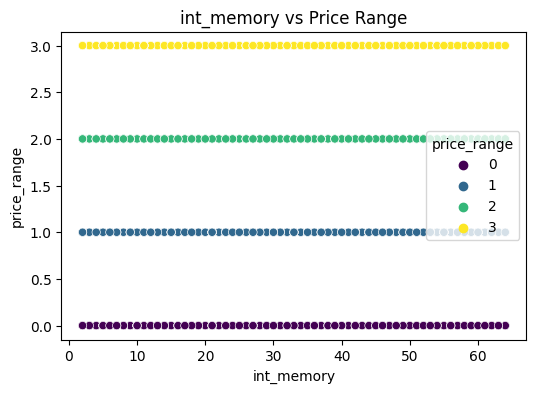

In [10]:
# Scatterplots of key numerical features vs price_range
key_features = ['ram', 'px_width', 'px_height', 'battery_power', 'int_memory']
for feature in key_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=feature, y='price_range', data=df_train, hue='price_range', palette='viridis')
    plt.title(f"{feature} vs Price Range")
    plt.show()

# Preprocessing

In [11]:
numeric_features = ['battery_power','clock_speed','fc','int_memory','m_dep',
                    'mobile_wt','n_cores','pc','px_height','px_width','ram',
                    'sc_h','sc_w','talk_time']

scaler = StandardScaler()
df_train[numeric_features] = scaler.fit_transform(df_train[numeric_features])
df_test[numeric_features] = scaler.transform(df_test[numeric_features])

# Train Test split

In [12]:
x =  df_train.drop('price_range', axis=1)
y = df_train['price_range']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train Models

## 1) LogisticRegression

In [14]:
LG_model = LogisticRegression()

In [15]:
LG_model.fit(x_train, y_train)

LogisticRegression()

In [16]:
y_pred = LG_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9800
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       105
           1       0.96      1.00      0.98        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



## 2) Decision Tree

In [17]:
DT_model = DecisionTreeClassifier()

In [18]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [19]:
y_pred = DT_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8325
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       105
           1       0.74      0.82      0.78        91
           2       0.79      0.70      0.74        92
           3       0.87      0.91      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



## 3) Random Forest

In [20]:
RF_model = RandomForestClassifier()
RF_model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = RF_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8850
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.87      0.89      0.88        91
           2       0.80      0.83      0.81        92
           3       0.92      0.87      0.89       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



## 4) Gradient Boosting

In [22]:
GB_model = GradientBoostingClassifier()
GB_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [23]:
y_pred = GB_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9050
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       105
           1       0.89      0.90      0.90        91
           2       0.82      0.86      0.84        92
           3       0.93      0.89      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



## 5) SVM

In [24]:
SVM_model = SVC()
SVM_model.fit(x_train, y_train)

SVC()

In [25]:
y_pred = SVM_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9100
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       105
           1       0.83      0.89      0.86        91
           2       0.86      0.86      0.86        92
           3       0.98      0.94      0.96       112

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



## 6) KNN

In [26]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6000
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       105
           1       0.40      0.51      0.45        91
           2       0.44      0.48      0.46        92
           3       0.85      0.68      0.76       112

    accuracy                           0.60       400
   macro avg       0.62      0.59      0.60       400
weighted avg       0.63      0.60      0.61       400

